Liteary Prizes 

Data Wrangling Stage

Make sure to:
*show understanding of how to acquire, organize, define and clean data.
*include data sets that are well-chosen and relevant to the problem
*demonstrate data-supported decisions on how to handle missing values, duplicates and outliers as needed



In [1]:
#Import the important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Come back (CB) to add more packages as necessary

In [2]:
#Load the data
#The data is a .tsv file, which I've never seen before so...
#https://stackoverflow.com/questions/48583002/how-to-open-a-tsv-file-in-jupyter-jupyter-notebook-tried-suggestions-but-it-d

#Also, I hadn't pushed the .tsv to my GitHub, but after I did,
#I clicked raw data, c+p into read_csv(), and added the sep='\t' argument

df = pd.read_csv('https://raw.githubusercontent.com/abigwind/literary-prizes/main/winnersandjudges.tsv', sep='\t')

In [3]:
#Check out the data, see if it worked

#df.head(28)

#I've commented it out so as to save space

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,iowa_mfa_person_id,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
0,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1981,poetry,book,10000.0,The Need To Hold Still: Poems
1,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
2,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
5,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,graduate,NaN,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
6,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,graduate,"University of Massachusetts, Amherst",NaN,NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
7,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,graduate,University of Alabama,NaN,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN
8,1872,Raquelsalas Rivera,Raquelsalas,Rivera,nonbinary/he,University of Pennsylvania,graduate,NaN,NaN,NaN,judge,Academy of American Poets,Lenore Marshall Poetry Prize,2020,poetry,book,25000.0,A Fortune For Your Disaster
9,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,1954,prose,book,15000.0,The Waking


In [4]:
#NICE! Okay, time to start finding some data! 
#Calling the info() to see a summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7133 entries, 0 to 7132
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_id              7133 non-null   int64  
 1   full_name              7133 non-null   object 
 2   given_name             7133 non-null   object 
 3   last_name              7133 non-null   object 
 4   gender                 7133 non-null   object 
 5   elite_institution      3329 non-null   object 
 6   graduate_degree        4775 non-null   object 
 7   mfa_degree             1900 non-null   object 
 8   iowa_mfa_person_id     735 non-null    object 
 9   stegner                344 non-null    object 
 10  role                   7133 non-null   object 
 11  prize_institution      7133 non-null   object 
 12  prize_name             7133 non-null   object 
 13  prize_year             7133 non-null   int64  
 14  prize_genre            7133 non-null   object 
 15  priz

It looks like we have a lot of full columns (names, gender, prize info), but we're severly missing in the Iowa MFA and Stegner columns, as well as less than half of the elite institution, MFA degree, and title of winning book columns. The graduate degree column is also missing 33% of it's data. 

I know that this dataset was connected to another specifically tracking graduates of Iowa's MFA program, which is why that column exists here, but for my purposes, I don't need to know an author's ID number so I want to drop that column.

But first let me see the first five rows for a baseline to use in future sanity checks

In [5]:
#Saving space by commenting out

#df.head()

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,iowa_mfa_person_id,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
0,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1981,poetry,book,10000.0,The Need To Hold Still: Poems
1,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
2,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN


In [6]:
#df = df.drop(columns='iowa_mfa_person_id', inplace=True)

In [7]:
#df.head()

Looks like I messed up. Here's my code: df = df.drop(columns='iowa_mfa_person_id', inplace=True) so I think what happeend was that I saved df as the dropped column

In [8]:
#print(type(df))

Start over! I'm going to comment out my previous code and try again.

In [9]:
#I did not specify the axis in this line of code and so data got shifted.
#df.drop(columns='iowa_mfa_person_id', inplace=True)

#Here is the revised code
df.drop(columns='iowa_mfa_person_id', axis=1, inplace=True)
df.head()

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
0,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1981,poetry,book,10000.0,The Need To Hold Still: Poems
1,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
2,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN


But now I'm scared that I lost data on authors who went to Iowa. Let's do a quick search for Iowa in 'elite_institution'.

In [10]:
#iowa = df[df['elite_institution'] == '*Iowa*']
#print(iowa)

Hmmm it's giving me an empty set. Maybe I'm doing this wrong. I'm going to comment out the above and try something else.

In [12]:
#Trying to find Iowa in here
df['elite_institution'].value_counts()

Harvard University                                                        742
Columbia University                                                       638
Stanford University                                                       392
Yale University                                                           387
Princeton University                                                      215
                                                                         ... 
Princeton University, Cornell University                                    1
Barnard College, Brown University, Stanford University                      1
Harvard University, University of Pennsylvania                              1
University of Pennsylvania, University of Chicago, Columbia University      1
Columbia University, University of Pennsylvania                             1
Name: elite_institution, Length: 71, dtype: int64

Okay, we're seeing something new about the Ivy League schools (Brown, Columnbai, Cornell, Dartmouth, Harvard, University of Pennsylvania, Princeton, Yale). I'm noticing that at the bottom, some rows have multiple schools. This will need a fix later in the code.

In [13]:
#Finding the percentages 
df['elite_institution'].value_counts(normalize=True)

Harvard University                                                        0.222890
Columbia University                                                       0.191649
Stanford University                                                       0.117753
Yale University                                                           0.116251
Princeton University                                                      0.064584
                                                                            ...   
Princeton University, Cornell University                                  0.000300
Barnard College, Brown University, Stanford University                    0.000300
Harvard University, University of Pennsylvania                            0.000300
University of Pennsylvania, University of Chicago, Columbia University    0.000300
Columbia University, University of Pennsylvania                           0.000300
Name: elite_institution, Length: 71, dtype: float64

Dang! Harvard makes up at least 22% of the authors' connection to an institution. I need to find out if that means they went there, graduated from there, and/or worked there, but for now, that's a pretty big number.

Now that I've mentioned work though, it has me thinking about the different roles: winner and judge. It might be time to separate the two into subset dataframes.

In [14]:
df['role'].value_counts()

judge     4338
winner    2795
Name: role, dtype: int64

Something to think about in the future is whether and how many winners are also judges at some point

In [15]:
#Create a winners dataframe
winners = df[df['role']=='winner']
winners.head()

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
5,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,graduate,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
6,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,graduate,"University of Massachusetts, Amherst",NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
7,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,graduate,University of Alabama,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN


In [16]:
#Let's double check the size. We should have 2795 rows
winners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 3 to 7130
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_id              2795 non-null   int64  
 1   full_name              2795 non-null   object 
 2   given_name             2795 non-null   object 
 3   last_name              2795 non-null   object 
 4   gender                 2795 non-null   object 
 5   elite_institution      1111 non-null   object 
 6   graduate_degree        1822 non-null   object 
 7   mfa_degree             821 non-null    object 
 8   stegner                142 non-null    object 
 9   role                   2795 non-null   object 
 10  prize_institution      2795 non-null   object 
 11  prize_name             2795 non-null   object 
 12  prize_year             2795 non-null   int64  
 13  prize_genre            2795 non-null   object 
 14  prize_type             2795 non-null   object 
 15  priz

In [17]:
#Perfect. Let's do the same with the judges.
judges = df[df['role']=='judge']
judges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 7132
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_id              4338 non-null   int64  
 1   full_name              4338 non-null   object 
 2   given_name             4338 non-null   object 
 3   last_name              4338 non-null   object 
 4   gender                 4338 non-null   object 
 5   elite_institution      2218 non-null   object 
 6   graduate_degree        2953 non-null   object 
 7   mfa_degree             1079 non-null   object 
 8   stegner                202 non-null    object 
 9   role                   4338 non-null   object 
 10  prize_institution      4338 non-null   object 
 11  prize_name             4338 non-null   object 
 12  prize_year             4338 non-null   int64  
 13  prize_genre            4338 non-null   object 
 14  prize_type             4338 non-null   object 
 15  priz

In [18]:
#But let's not forget about Iowa. 
#I need to find a way to see all the elite institutions
[institute for institute in df['elite_institution'] ]

[nan,
 nan,
 nan,
 nan,
 nan,
 'Radcliffe College',
 nan,
 nan,
 'University of Pennsylvania',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'Columbia University',
 'Columbia University',
 nan,
 'Harvard University',
 'Harvard University',
 nan,
 nan,
 'Stanford University',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Columbia University',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Harvard University',
 'Cornell University',
 nan,
 'Yale University',
 'Columbia University',
 nan,
 'Stanford University',
 nan,
 'University of Pennsylvania',
 'Harvard University',
 'Stanford University',
 'Columbia University',
 'Columbia University',
 nan,
 nan,
 'Yale University',
 'Yale University',
 'Yale University',
 nan,
 nan,
 nan,
 'Stanford University',
 'Harva

This isn't perfect, and I'd like to include a conditional in here, but I haven't got it yet. Either way, I'm not seeing Iowa from a cursory look. Which might be the reason the dataframe with Iowa was coming up empty. Let's try in the mfa_degree column.

In [19]:
#Checking through institutes with a list comprehension 
#on the column 'mfa_degree'
[institute for institute in df['mfa_degree'] ]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'University of Massachusetts, Amherst',
 'University of Alabama',
 nan,
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'Columbia University',
 nan,
 nan,
 nan,
 nan,
 nan,
 'University of Montana',
 nan,
 nan,
 nan,
 'University of Iowa',
 nan,
 'University of Iowa',
 'University of Arizona',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Bennington College',
 nan,
 nan,
 nan,
 'Warren Wilson College',
 nan,
 nan,
 'University of Oregon',
 nan,
 'Washington University',
 nan,
 nan,
 nan,
 nan,
 nan,
 'University of Iowa',
 'University of Iowa',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Ohio State University',
 'University of Texas, El Paso',
 nan,
 'Cornell University',
 nan,
 'University of Montana',
 nan,
 nan,
 nan,
 nan,
 'Universit

That's the ticket! But I'm seeing 'No Winner' which must mean that those rows are from people who are judges. Let's check what this list comprehension does in the winners dataframe.

In [20]:
#List comprehension on just the winners dataframe
[institute for institute in winners['mfa_degree'] ]

[nan,
 nan,
 nan,
 'University of Massachusetts, Amherst',
 'University of Alabama',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 'No Winner',
 nan,
 'University of Iowa',
 'University of Arizona',
 nan,
 nan,
 nan,
 nan,
 'University of Iowa',
 nan,
 nan,
 'Ohio State University',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'University of Arizona',
 nan,
 nan,
 nan,
 nan,
 'University of Iowa',
 nan,
 nan,
 nan,
 'University of Iowa',
 'University of Iowa',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Washington University',
 nan,
 'Institute of American Indian Arts',
 'Institute of American Indian Arts',
 'Institute of American Indian Arts',
 'Univeristy of California, Irvine',
 nan,
 'University of Texas, Austin',
 'University of Iowa',
 nan,
 'University of Iowa',
 nan,
 nan,
 nan,
 nan,

Hmmm that didn't seem to work. I'm going to look again at the winners dataframe but maybe the first 20 rows.

In [21]:
#Commenting out to save room
#winners.head(20)

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
5,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,graduate,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
6,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,graduate,"University of Massachusetts, Amherst",NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
7,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,graduate,University of Alabama,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN
9,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,1954,prose,book,15000.0,The Waking
10,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,1941,prose,book,15000.0,Sunderland Capture
11,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,2012,prose,book,15000.0,No Winner
12,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,1974,prose,book,15000.0,No Winner
13,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,1971,prose,book,15000.0,No Winner


WHOA something went really wrong. I'm seeing a bunch of rows without winners. Did an index get misplaced? What happened? Let's see if the original dataset is messed up post the column being dropped.

In [22]:
#Commenting out to save room
#df.head(20)

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
0,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1981,poetry,book,10000.0,The Need To Hold Still: Poems
1,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
2,922,Inge Judd,Inge,Judd,unknown,NaN,NaN,NaN,NaN,judge,National Book Foundation,National Book Award,1982,prose,book,10000.0,"Rabbit Is Rich & So Long, See You Tomorrow"
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
5,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,graduate,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
6,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,graduate,"University of Massachusetts, Amherst",NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
7,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,graduate,University of Alabama,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN
8,1872,Raquelsalas Rivera,Raquelsalas,Rivera,nonbinary/he,University of Pennsylvania,graduate,NaN,NaN,judge,Academy of American Poets,Lenore Marshall Poetry Prize,2020,poetry,book,25000.0,A Fortune For Your Disaster
9,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Columbia University,Pulitzer Prize,1954,prose,book,15000.0,The Waking


Wait a minute. I don't know what's going on. At index 9, I'm starting to see a bunch of No Winners. Maybe I messed up the drop columns? What does does the inplace=True argument actually do? Let's look up some documentation. 

Okay, so inplace=True makes it so you don't have to rename your dataframe. I was supposed to use axis = 1 for columns, but something is still not right. I'm going to restart the whole thing and make a new dataframe without inplace=True.

Wait a minute. I just tried to start back from reloading the data and now I'm finding that there are multiple 'No Winners'? Okay, let's see if we can check this out.

In [23]:
#Create a counter to find out how many full_names are 'No Winner'
no_win = 0
for name in df['full_name']:
    if name == 'No Winner':
        no_win += 1
    else:
        no_win += 0
print(no_win)

18


Looks like there are 18 rows without a winner! This is awesome! Not too many, just enough to do some research! 

First let's print out the the No Winners! 

In [24]:
#Slice out the no_winners rows with indexing numbers found from the 
#start, plus slicing out the first 8 columns since that's all repeated 
#info

no_winners = pd.DataFrame(df.iloc[9:27, 11:])

In [25]:
#Commenting out to save room
#no_winners

,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
9,Pulitzer Prize,1954,prose,book,15000.0,The Waking
10,Pulitzer Prize,1941,prose,book,15000.0,Sunderland Capture
11,Pulitzer Prize,2012,prose,book,15000.0,No Winner
12,Pulitzer Prize,1974,prose,book,15000.0,No Winner
13,Pulitzer Prize,1971,prose,book,15000.0,No Winner
14,Pulitzer Prize,1964,prose,book,15000.0,No Winner
15,Pulitzer Prize,1957,prose,book,15000.0,No Winner
16,Pulitzer Prize,1946,poetry,book,15000.0,No Winner
17,Pulitzer Prize,1946,prose,book,15000.0,No Winner
18,Academy of American Poets Fellowship,1951,poetry,career,25000.0,NaN


18 doesn't seem like that many pieces of data to find out. Let's do some searching! Antyhing in caps is new info

9. THEODORE ROETHKE-MALE-Pulitzer-1954-POETRY-book-15000-The Waking
*need to find other information about colleges
*The prize for 1954 was $500
**Upon further research, this data row already exists. No need to re-enter it, but definitely need to delete since both books are showing up

10. LEONARD BACON-MALE-Pulitzer-1941-POETRY-book-15000-Sunderland Capture
*Same college info needed
*The prize was $1000 this year for some reason
**Upon further research, this data row already exists. No need to re-enter it, just delete.

11. No one won the prose prize this year, but Tracy Smith won for poetry so this one can be dropped!!!

12. No one won prose this year. Another delete! 

13. Ibid (!)

14. Ibid (!)

15. No prose this year. It makes me think about whether it's important to keep in the non-winners. Could be useful to predict if you don't win.

16. No prose no poetry.

17. See above.

18. Couldn't confirm this on AAP's website, but on handy Wikipedia. 
*Looks like we're getting some Nan. I want to find more of these.

19. W. H. Auden won this year. Need to change. Confirmed 
*Confirmed, but this data exists elsewhere in the dataframe.

20. Nope.

21. Randall Jarrell as appointed this year. What's the deal? Maybe he shows up at a different year? It looks like in the data set, he shows up for winning the 1956, 57, and 58 for the Poet Laureate. 
*Nope, he was appointed 1956, which is in the dataframe.

22. No one here.

23. Or here.

24. This is a weird one. Apparently William Carlos Williams was appointed, but did not serve? Did he get the money? Looking further into it, he was maligned by newspapers for being Communist or having Communist sympathies, and his assignment was canceled. But then people rallied behind him and get him reinstated? 

25. No one this year.

26. 1941 was the end of term for the first Poet Laureate, Joseph Auslander. He served from 1937-1941. I'll check the data. Yep, he's in here, winning all of those years.

Before I start dropping rows and changing at least index 19 and 24, I'm going to push this to the repository.

In [56]:
#Making sure I found who I was looking for
winners.loc[19]

person_id                                      1732
full_name                                 No Winner
given_name                                No Winner
last_name                                 No Winner
gender                                    No Winner
elite_institution                         No Winner
graduate_degree                           No Winner
mfa_degree                                No Winner
stegner                                   No Winner
role                                         winner
prize_institution                   Yale University
prize_name               Bollingen Prize for Poetry
prize_year                                     1953
prize_genre                                  poetry
prize_type                                   career
prize_amount                                10000.0
title_of_winning_book                           NaN
Name: 19, dtype: object

In [60]:
#Get information for Auden
print(winners[winners['last_name']=='Auden'])

      person_id    full_name given_name last_name gender elite_institution  \
315        2315  W. H. Auden      W. H.     Auden   male               NaN   
687        2315  W. H. Auden      W. H.     Auden   male               NaN   
4624       2315  W. H. Auden      W. H.     Auden   male               NaN   
4625       2315  W. H. Auden      W. H.     Auden   male               NaN   

     graduate_degree mfa_degree stegner    role  \
315              NaN        NaN     NaN  winner   
687              NaN        NaN     NaN  winner   
4624             NaN        NaN     NaN  winner   
4625             NaN        NaN     NaN  winner   

                         prize_institution                      prize_name  \
315               National Book Foundation             National Book Award   
687                    Columbia University                  Pulitzer Prize   
4624  American Academy of Arts and Letters  Award of Merit Medal in Poetry   
4625                       Yale Universit

Well, it looks like it's already in here that he won the Bollingen Prize. So I guess I can delete the corresponding No Winner row. I should re-check my other years for updates.

In [62]:
print(winners[winners['full_name']=='William Carlos Williams'])

      person_id                full_name      given_name last_name gender  \
829        2359  William Carlos Williams  William Carlos  Williams   male   
943        2359  William Carlos Williams  William Carlos  Williams   male   
3864       2359  William Carlos Williams  William Carlos  Williams   male   

               elite_institution graduate_degree mfa_degree stegner    role  \
829   University of Pennsylvania             NaN        NaN     NaN  winner   
943   University of Pennsylvania             NaN        NaN     NaN  winner   
3864  University of Pennsylvania             NaN        NaN     NaN  winner   

              prize_institution                            prize_name  \
829    National Book Foundation                   National Book Award   
943         Columbia University                        Pulitzer Prize   
3864  Academy of American Poets  Academy of American Poets Fellowship   

      prize_year prize_genre prize_type  prize_amount   title_of_winning_book  
8

So I can't find a poet laureate for William Carlos Williams by looking up his name. But I'll double check all the Poet Laureates.

In [69]:
pl = pd.DataFrame(winners[winners['prize_name']=='Poet Laureate'])

In [70]:
#Commenting out to save room
#pl

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
20,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Library of Congress,Poet Laureate,1956,poetry,career,35000.0,NaN
21,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Library of Congress,Poet Laureate,1955,poetry,career,35000.0,NaN
22,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Library of Congress,Poet Laureate,1954,poetry,career,35000.0,NaN
23,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Library of Congress,Poet Laureate,1953,poetry,career,35000.0,NaN
24,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Library of Congress,Poet Laureate,1952,poetry,career,35000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,1224,Josephine Jacobsen,Josephine,Jacobsen,female,NaN,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,1971,poetry,career,35000.0,NaN
6959,1434,Louise Bogan,Louise,Bogan,female,NaN,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,1946,poetry,career,35000.0,NaN
6960,1434,Louise Bogan,Louise,Bogan,female,NaN,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,1945,poetry,career,35000.0,NaN
6985,1437,Louise Gluck,Louise,Gluck,female,NaN,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,2004,poetry,career,35000.0,NaN


What a minute. How can there be 136 rows? Let's look for  duplicate years becasue, I'm pretty sure this data goes up to 2020 and the earliest Poet Laureate is 1937 which gives us under 100 years.

In [85]:
#Used a list comprehension to put each year into a list
year_dups = []
[year_dups.append(year) for year in pl['prize_year']]

None


In [86]:
#Sorted list
year_dups.sort()

In [87]:
#Print list to check for duplicates. From a quick scan I see
#1941, 1944-1949. William Carlos Williams won in 1952 which 
#has a duplicate, but we shall see.

print(year_dups)

[1937, 1938, 1939, 1940, 1941, 1941, 1942, 1943, 1944, 1944, 1945, 1945, 1946, 1946, 1947, 1947, 1948, 1948, 1949, 1949, 1950, 1950, 1951, 1952, 1952, 1953, 1954, 1955, 1956, 1956, 1957, 1958, 1958, 1959, 1959, 1960, 1961, 1961, 1962, 1963, 1963, 1964, 1964, 1965, 1965, 1966, 1966, 1967, 1968, 1968, 1969, 1970, 1970, 1971, 1971, 1972, 1973, 1973, 1974, 1974, 1975, 1976, 1976, 1977, 1978, 1978, 1979, 1980, 1981, 1982, 1982, 1983, 1984, 1984, 1984, 1985, 1985, 1985, 1986, 1986, 1987, 1987, 1988, 1988, 1989, 1990, 1990, 1991, 1991, 1992, 1992, 1993, 1993, 1994, 1995, 1995, 1996, 1997, 1997, 1998, 1999, 2000, 2000, 2001, 2001, 2002, 2003, 2003, 2004, 2004, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2010, 2010, 2011, 2011, 2012, 2012, 2013, 2014, 2014, 2015, 2015, 2016, 2017, 2017, 2018, 2019, 2019, 2020]


In [91]:
dup_func = pl.duplicated(subset='prize_year', keep=False)

In [94]:
dup_pl = pl[dup_func].sort_values(by='prize_year')

In [102]:
#Commenting out to save room

#dup_pl

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
4017,1203,Joseph Auslander,Joseph,Auslander,male,Harvard University,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,1941,poetry,career,35000.0,NaN
26,1732,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,No Winner,winner,Library of Congress,Poet Laureate,1941,poetry,career,35000.0,NaN
3768,1980,Robert Penn Warren,Robert Penn,Warren,male,NaN,graduate,NaN,NaN,winner,Library of Congress,Poet Laureate,1944,poetry,career,35000.0,NaN
4184,95,Allen Tate,Allen,Tate,male,NaN,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,1944,poetry,career,35000.0,NaN
6960,1434,Louise Bogan,Louise,Bogan,female,NaN,NaN,NaN,NaN,winner,Library of Congress,Poet Laureate,1945,poetry,career,35000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,364,Charles Wright,Charles,Wright,male,NaN,graduate,University of Iowa,NaN,winner,Library of Congress,Poet Laureate,2015,poetry,career,35000.0,NaN
2060,1234,Juan Felipe Herrera,Juan Felipe,Herrera,male,Stanford University,graduate,University of Iowa,NaN,winner,Library of Congress,Poet Laureate,2017,poetry,career,35000.0,NaN
6138,2276,Tracy Smith,Tracy,Smith,female,"Harvard University, Columbia University, Stanf...",graduate,Columbia University,Stegner,winner,Library of Congress,Poet Laureate,2017,poetry,career,35000.0,NaN
6136,2276,Tracy Smith,Tracy,Smith,female,"Harvard University, Columbia University, Stanf...",graduate,Columbia University,Stegner,winner,Library of Congress,Poet Laureate,2019,poetry,career,35000.0,NaN


What appears to be happening is an overlap. Let's look at Tracy K. Smith. She was Poet Laureate from 2017-2019. In 2019, Joy Harjo became the Poet Laurate. So both get listed for 2019. I need to do some research and find out how people get paid since this is our major factor. If Tracy K. Smith got paid $35,000 once for the whole time, twice for the 2017-2018 year and 2018-2019 year, or some other configuration, I need to figure out.

I found on the NYPL blog that Poet Laureates get a 35,000 stipend ANNUALLY. So I'm going to make an executive decision and say that a winner of three years in the dataframe, like Tracy K. Smith, probably received two 35,000 stipends for each term. So I'm now going to have to search for 

In [152]:
#Dropping any 'No Winner' for winners dataframe

winners_wo = winners[winners['full_name'] != 'No Winner']

In [153]:
#The original winners dataframe had 2795. There were 18 rows of No Winner.
#2795 - 18 = 2777! Excatly what we needed!
winners_wo

,person_id,full_name,given_name,last_name,gender,elite_institution,graduate_degree,mfa_degree,stegner,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,title_of_winning_book
3,1891,Reuben Bercovitch,Reuben,Bercovitch,unknown,NaN,NaN,NaN,NaN,winner,PEN America,Hemingway Award for Debut Novel,1979,prose,book,10000.0,Hasen
4,1807,Pauline Hanson,Pauline,Hanson,unknown,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972,no genre,career,10000.0,NaN
5,1032,Jean Valentine,Jean,Valentine,female,Radcliffe College,graduate,NaN,NaN,winner,Yale University,Bollingen Prize for Poetry,2017,poetry,career,10000.0,NaN
6,123,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,NaN,graduate,"University of Massachusetts, Amherst",NaN,winner,Whiting Foundation,Whiting Award,2020,no genre,career,50000.0,NaN
7,1295,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,NaN,graduate,University of Alabama,NaN,winner,Whiting Foundation,Whiting Award,2019,no genre,career,50000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,2210,Tessa Hadley,Tessa,Hadley,female,NaN,NaN,NaN,NaN,winner,Yale University,Windham Campbell Prize,2016,prose,career,165000.0,NaN
7126,2247,Timberlake Wertenbaker,Timberlake,Wertenbaker,female,NaN,NaN,NaN,NaN,winner,Whiting Foundation,Whiting Award,1989,no genre,career,50000.0,NaN
7127,2253,Tina Howe,Tina,Howe,female,NaN,NaN,NaN,NaN,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993,no genre,career,10000.0,NaN
7128,2399,Yannick Murphy,Yannick,Murphy,female,NaN,NaN,NaN,NaN,winner,Whiting Foundation,Whiting Award,1990,no genre,career,50000.0,NaN


In [144]:
#I want to reset the index of winners_no

winners_wo.reset_index

<bound method DataFrame.reset_index of       person_id               full_name  given_name    last_name  \
3          1891       Reuben Bercovitch      Reuben   Bercovitch   
4          1807          Pauline Hanson     Pauline       Hanson   
5          1032          Jean Valentine        Jean    Valentine   
6           123           Andrea Lawlor      Andrea       Lawlor   
7          1295    Kayleb Rae Candrilli  Kayleb Rae    Candrilli   
...         ...                     ...         ...          ...   
7125       2210            Tessa Hadley       Tessa       Hadley   
7126       2247  Timberlake Wertenbaker  Timberlake  Wertenbaker   
7127       2253               Tina Howe        Tina         Howe   
7128       2399          Yannick Murphy     Yannick       Murphy   
7130       2410              Zoe Wicomb         Zoe       Wicomb   

              gender  elite_institution graduate_degree  \
3            unknown                NaN             NaN   
4            unknown      

<bound method DataFrame.reset_index of       person_id               full_name  given_name    last_name  \
3          1891       Reuben Bercovitch      Reuben   Bercovitch   
4          1807          Pauline Hanson     Pauline       Hanson   
5          1032          Jean Valentine        Jean    Valentine   
6           123           Andrea Lawlor      Andrea       Lawlor   
7          1295    Kayleb Rae Candrilli  Kayleb Rae    Candrilli   
...         ...                     ...         ...          ...   
7125       2210            Tessa Hadley       Tessa       Hadley   
7126       2247  Timberlake Wertenbaker  Timberlake  Wertenbaker   
7127       2253               Tina Howe        Tina         Howe   
7128       2399          Yannick Murphy     Yannick       Murphy   
7130       2410              Zoe Wicomb         Zoe       Wicomb   

              gender  elite_institution graduate_degree  \
3            unknown                NaN             NaN   
4            unknown      

In [104]:
print(winners['mfa_degree'].value_counts().head(67))

University of Iowa                  246
Columbia University                  71
New York University                  49
Univeristy of California, Irvine     23
Brown University                     22
                                   ... 
Hollins College                       2
Spalding University                   2
University of Alabama                 2
University of Illinois                2
University of Florida                 2
Name: mfa_degree, Length: 67, dtype: int64


In [105]:
print(winners['mfa_degree'].value_counts()[68:])

University of California, Los Angeles                     1
University of Alaska Fairbanks                            1
Northwestern University                                   1
University of Nevada                                      1
SUNY Brookport                                            1
Southern New Hampshire University                         1
Eastern Washington University                             1
Hunter College                                            1
Georgia State University                                  1
Drew University                                           1
SUNY Stonybrook                                           1
Louisiana State University                                1
Goucher College                                           1
Columba College                                           1
North Carolina State University                           1
Vanderbilt University                                     1
Tisch School of the Arts                

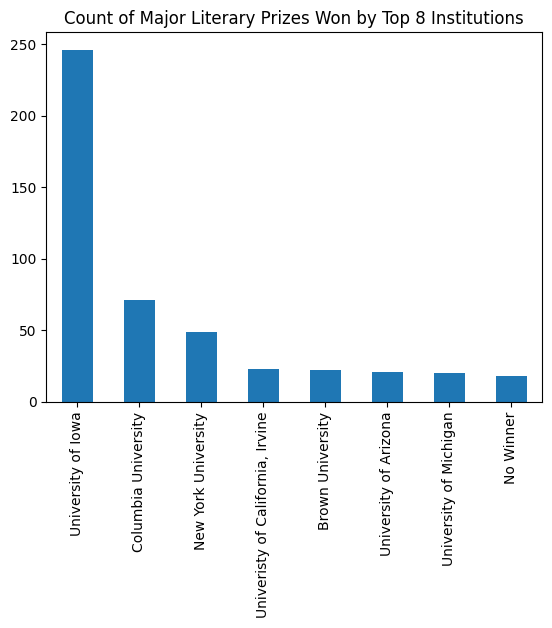

In [115]:
#Let's make a bar chart of value counts for top 8 school

winner_count = winners['mfa_degree'].value_counts()[:8]
winner_count.plot(kind='bar', 
                  title='Count of Major Literary Prizes Won by Top 8 Institutions')
plt.show()

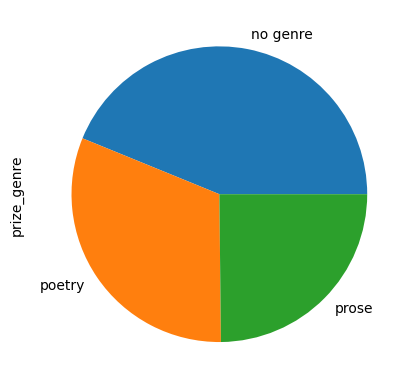

In [112]:
#Getting a general idea for what genres win. Looks like there
#are more peotry than prose, but definitely more "no genre"
#which makes me wonder about the connection between "no genre"
#and career prizes 

genre = winners['prize_genre'].value_counts()
genre.plot(kind='pie')
plt.show()

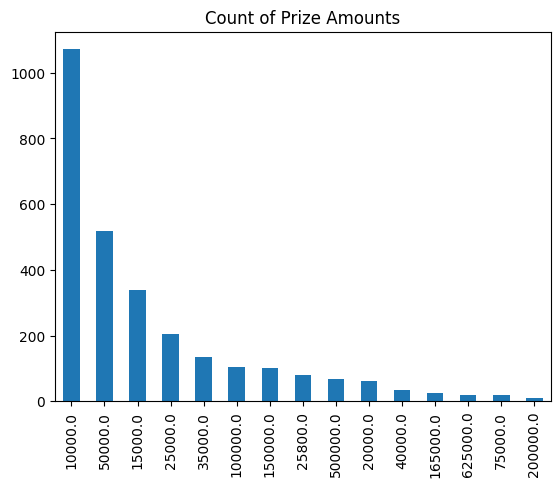

In [138]:
#This is off. The values below are sorted by count, not by
#how much they offer

prize_amounts = winners['prize_amount'].value_counts()
prize_amounts.plot(kind='bar', 
                  title='Count of Prize Amounts')
plt.show()

In [116]:
#Heavily skewed left, with 15 people winning the $200,000
#McArthur Fellowship AWar
prize_amounts.describe()

count      15.000000
mean      186.333333
std       281.292341
min        10.000000
25%        30.000000
50%        81.000000
75%       170.500000
max      1071.000000
Name: prize_amount, dtype: float64

In [123]:
prize_name_counts = winners.groupby('prize_name')['prize_amount'].count()

In [124]:
prize_name_counts

prize_name
Academy of American Poets Fellowship                           89
Art of Change                                                   8
Arthur Rense Prize                                              8
Arts and Letters Awards                                       610
Award of Merit Medal in Poetry                                 13
Award of Merit Medal in the Novel                              14
Award of Merit Medal in the Short Story                         6
Bellwether Prize for Socially Engaged Fiction                  10
Benjamin H. Danks Award                                         7
Bollingen Prize for Poetry                                     53
Christopher Lightfoot Walker Award                              2
Diamonstein-Spielvogel Award For The Art Of The Essay           5
Diamonstein-Spielvogel Award for the Art of the Essay          20
Drue Heinz Literature Prize                                    40
E. M. Forster Award                                            41

In [128]:
#Commenting out to save room

#prize_name_counts.sort_values()

prize_name
Fusion Emerging Writers Prize                                   2
W. G. Sebald Award For Fiction Writer In Mid-Career             2
Christopher Lightfoot Walker Award                              2
Jean Stein Book Award                                           4
Joyce Carol Oates Literary Prize/Simpson Family                 4
John Updike Award                                               5
Diamonstein-Spielvogel Award For The Art Of The Essay           5
Award of Merit Medal in the Short Story                         6
Benjamin H. Danks Award                                         7
Saul Bellow Award For Achievement In American Fiction           7
Lannan Lifetime Achievement Award                               7
Kirkus Prize                                                    7
Arthur Rense Prize                                              8
Art of Change                                                   8
Bellwether Prize for Socially Engaged Fiction                  10

In [133]:
#Commenting out to save room

#print(list(winners.groupby('prize_name')['prize_amount']))

[('Academy of American Poets Fellowship', 18      25000.0
1834    25000.0
2009    25000.0
2237    25000.0
2369    25000.0
         ...   
6949    25000.0
6995    25000.0
7014    25000.0
7071    25000.0
7090    25000.0
Name: prize_amount, Length: 89, dtype: float64), ('Art of Change', 1829    50000.0
2640    50000.0
3481    50000.0
5874    50000.0
5973    50000.0
6033    50000.0
6187    50000.0
6579    50000.0
Name: prize_amount, dtype: float64), ('Arthur Rense Prize', 2603    20000.0
2682    20000.0
3275    20000.0
3485    20000.0
3546    20000.0
4209    20000.0
5812    20000.0
7054    20000.0
Name: prize_amount, dtype: float64), ('Arts and Letters Awards', 4       10000.0
1813    10000.0
1817    10000.0
1819    10000.0
1820    10000.0
         ...   
7104    10000.0
7105    10000.0
7107    10000.0
7123    10000.0
7127    10000.0
Name: prize_amount, Length: 610, dtype: float64), ('Award of Merit Medal in Poetry', 2145    25000.0
2419    25000.0
2751    25000.0
2799    25000.0
2934    2